<font color = green>

# Linear Regression. Multi Features. Various minimization functions
</font>

<font color = green >

### Set interactive backend 
</font>

In [21]:
%matplotlib notebook

In [22]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split

<font color = green >

### Load boston data set 
</font>

In [64]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)

# X= X[:,5].reshape(-1,1) # 5 corresponds to 'RM' 
# X= X[:,:5]

X_train, X_test, y_train, y_test=  train_test_split(X, y, random_state=2018)
print ('X_train.shape= ',X_train.shape)
print ('y_train.shape= ',y_train.shape)
X_train[:5]

X_train.shape=  (379, 13)
y_train.shape=  (379,)


array([[1.17470e-01, 1.25000e+01, 7.87000e+00, 0.00000e+00, 5.24000e-01,
        6.00900e+00, 8.29000e+01, 6.22670e+00, 5.00000e+00, 3.11000e+02,
        1.52000e+01, 3.96900e+02, 1.32700e+01],
       [1.20482e+01, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.14000e-01,
        5.64800e+00, 8.76000e+01, 1.95120e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 2.91550e+02, 1.41000e+01],
       [1.28160e-01, 1.25000e+01, 6.07000e+00, 0.00000e+00, 4.09000e-01,
        5.88500e+00, 3.30000e+01, 6.49800e+00, 4.00000e+00, 3.45000e+02,
        1.89000e+01, 3.96900e+02, 8.79000e+00],
       [5.78340e-01, 2.00000e+01, 3.97000e+00, 0.00000e+00, 5.75000e-01,
        8.29700e+00, 6.70000e+01, 2.42160e+00, 5.00000e+00, 2.64000e+02,
        1.30000e+01, 3.84540e+02, 7.44000e+00],
       [8.71675e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.93000e-01,
        6.47100e+00, 9.88000e+01, 1.72570e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.91980e+02, 1.71200e+01]])

<font color = green >

### Develop classifier using gradient descent

</font>

In [65]:
class Linear_Regression():
    '''linear regression using gradient descent w/o regularization
        types and shapes: 
            w, dJw [1,n]
            b,dJb float
            X [m,n]
            y [m,] -> [m,1]
            h [m,1]
            J - float 
            m samples
            n features 
    '''
    def __init__(self, max_iter = 1e5, alpha = 0.001,eps = 1e-10, verbose= 0):
        '''
        :param verbose: set 1 to display more details of J val changes
        '''
        self.max_iter = max_iter
        self.alpha = alpha
        self.eps = eps
        self.verbose = verbose       
        
    def h(self, b, w, X): 
        '''
        :param b -  float or ndarry of shape [m,1], m - number of samples
        :param w - ndarray of shape [1,m],  n - number of features
        :param X - ndarray of shape [m,n], m - number of samples, n - number of features
        '''
        assert (X.shape[1]== w.shape[1])
        h_res= b + X @ w.T
        if h_res.shape != (X.shape[0],1):
            print('h.shape = {} but expected {}'.format (h_res.shape,  (self.m,1)))
            raise Exception('Check assertion in h')    
        return h_res

    def J (self, h, y):      
        '''
        :param h - ndarray of shape (m,1)
        :param y - ndarray of shape (m,1)
        :return expression for cost function 
        '''
        if h.shape !=y.shape:
            print('h.shape = {} does not match y.shape = {}.Expected {}'.format (h.shape, y.shape, (self.m,1)))
            raise Exception('Check assertion in J')    
        return 1/(2*self.m)*np.sum((h-y)**2)  
        
    def J_derivative(self, params, X, y): 
        '''
        :param params - tuple (b,w), where w is the 2d ndarry of shape (1,n), n- number of features 
        :param X- ndarray of shape (m, n)
        :param y - ndarray of shape (m,1)
        :return tuple of derivatrives of cost function by b and w
        '''
      
        b,w = params
        assert (w.shape == (1,self.n))                
        h_val = self.h(b,w,X)
        if  h_val.shape != (self.m, 1):
            print('h.shape = {}, but expected {}'.format (h_val.shape, (self.m, 1)))
            raise Exception('Check assertion in J_derivative')
        if h_val.shape !=y.shape:
            print('h.shape = {} does not match y.shape = {}.Expected {}'.format (h_val.shape, y.shape, (self.m,1)))
            raise Exception('Check assertion in J_derivative')    

        
        dJ_b= 1/self.m * np.sum(h_val - y)        
        # dJ_w=  1/self.m * np.sum((h_val - y)*X)
        
        error = h_val - y
        assert (error.shape == (self.m, 1))        
        assert (X.shape == (self.m, self.n))  
        # Calc all derivatives at once: dJ_w
        dJ_w = 1/self.m * error.T @ X # Note: @ this performs necessary sum by x_i
        assert (dJ_w.shape == (1, self.n))  
        
        return (dJ_b, dJ_w)

    def fit(self, X, y):
        '''
        :param X - ndarray training set of shape [m,n], m - number of samples, n - number of features
        :param y - ndarray - 1d array 
        :return: True in case of successful fit 
        '''      
        
        if self.verbose: 
            print ('Running gradient descent with alpha = {}, eps= {}, max_iter= {}'.format(
                self.alpha, self.eps, self.max_iter))
        self.m, self.n= X.shape # number of samples, number of features  
        y = y.reshape(self.m,1) # make it 2 d to make sure it corresponds to h_val
        b = 0 # # init intercept with 0
        w= np.zeros(self.n).reshape(1,-1) # make sure it's shape is [1,n]
        params = (b,w)
        
        self.J_hist=[-1] # used for keeping J values. Init with -1 to avoid 0 at first iter
        continue_iter = True # flag to continue next iter (grad desc step)
        iter_number =0 # used for limit by max_iter

        while continue_iter:            
            # Do step of gradient descent    
            dJ_b, dJ_w =  self.J_derivative(params, X, y)
            b= b- self.alpha  *dJ_b
            w= w- self.alpha  *dJ_w # this is operation with all w 
            params= (b,w)
            # keep history of J values
            self.J_hist.append(self.J(self.h(b, w, X), y))
            if self.verbose:
                print (self.J_hist[-1])
            # check criteria of exit (finish grad desc)
            if self.max_iter and iter_number> self.max_iter: # if max_iter is provided and limit succeeded
                continue_iter = False
            elif np.abs(self.J_hist[iter_number-1] - self.J_hist[iter_number])< self.eps: # if accuracy is succeeded
                continue_iter = False
            iter_number += 1
        
        self.intercept_, self.coef_= params        
        return True
        
    def draw_cost_changes(self):        
        J_hist= self.J_hist[1:]
        plt.figure()
        plt.scatter(np.arange(0,len(J_hist)),J_hist,s=20,marker='.',c='b')
        plt.xlabel('Iterations')
        plt.ylabel('Cost function J value')
        title_str = 'Complited: {}, alpha ={}, max_iter={}, eps={}'.format( len(self.J_hist)-2, self.alpha, self.max_iter,self.eps)
        # Note: len(J_hist)-2) due to first one is -1 (was not iteration), iter + 1  at the end  of the gradient loop
        plt.title(title_str)
 

    def predict(self, X): 
        '''
        :param X - ndarray of shape (?,n)
        :return 
        '''
        return self.h(self.intercept_, self.coef_, X)
        
   
    def score(self, X_test, y_test):
        '''
        :param X_test - ndarray testing set or any for prediction of shape [?,n], ? - number of samples, n - number of features
        :param y_test - ndarray - 1d array 
        :return R2 score of y_test and prediction for X_test
        '''
        z= self.predict(X_test)
        from sklearn.metrics.scorer import r2_score
        return (r2_score(y_test, z))


In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)


<IPython.core.display.Javascript object>


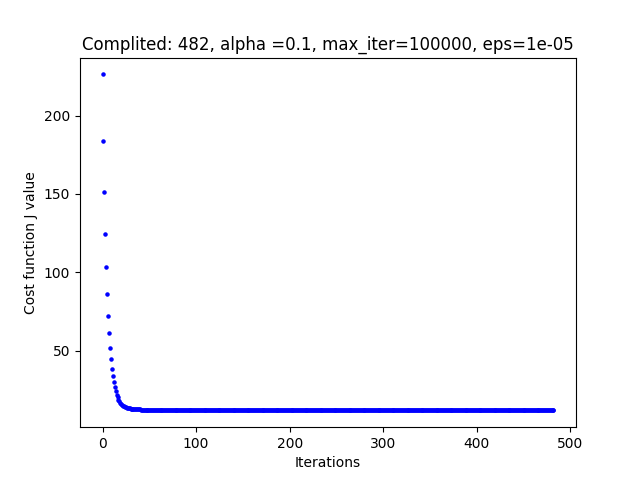

R2 training Score = 0.7282931427499254
R2 Score = 0.7713187032358573
b: 22.199472295514532, w= [[-0.66395848  1.09969834  0.00637564  0.8268505  -2.22926894  2.43174652
   0.2554171  -3.29518434  2.4471576  -1.9921156  -1.95141415  0.77441038
  -4.21071195]]


In [84]:
lin_reg = Linear_Regression(alpha= 0.1, verbose=0, eps=1e-5, max_iter=100000)
lin_reg.fit (X_train_scaled, y_train)
lin_reg.draw_cost_changes()
print ('R2 training Score =', lin_reg.score(X_train_scaled, y_train))
print ('R2 Score =', lin_reg.score(X_test_scaled, y_test))
print ('b: {}, w= {}'.format(lin_reg.intercept_, lin_reg.coef_)) 

In [ ]:
if X_train.shape[1]>1:
    print ('Select single feature to plot')
else:    
    plt.figure()
    plt.scatter(X_train, y_train)
    x_line= np.array([np.min(X_train), np.max(X_train)])
    z_line = lin_reg.predict(x_line.reshape(-1,1))
    plt.plot(x_line, z_line, '-', c='red')

<font color = green >

### Using Minimize function

</font>

In [48]:
from scipy.optimize import minimize

In [55]:
class Linear_Regression_Minimize():
    '''linear regression using minimize function of scipy,optimize
        types and shapes: 
            w, dJw [1,n]
            b,dJb float
            X [m,n]
            y [m,] -> [m,1]
            h [m,1]
            J - float 
            m samples
            n features 
    '''
    def __init__(self, max_iter = 1e5, alpha = 0.001,eps = 1e-10, verbose= 0):
        '''
        :param verbose: set 1 to display more details of J val changes
        '''
        self.max_iter = max_iter
        self.alpha = alpha
        self.eps = eps
        self.verbose = verbose       
        
    def h(self, b, w, X): 
        '''
        :param b -  float or ndarry of shape [m,1], m - number of samples
        :param w - ndarray of shape [1,m],  n - number of features
        :param X - ndarray of shape [m,n], m - number of samples, n - number of features
        '''
        w = w.reshape(1,-1)
        assert (X.shape[1]== w.shape[1])
        h_res= b + X @ w.T
        if h_res.shape != (X.shape[0],1):
            print('h.shape = {} but expected {}'.format (h_res.shape,  (self.m,1)))
            raise Exception('Check assertion in h')    
        return h_res

    def J (self,params):      

        b= params[0]
        w= params[1:]
        return 1/(2*self.m)*np.sum((self.h(b, w, self.X_train)-self.y_train)**2)         

    
    def fit(self, X_train, y_train):
        '''
        :param X - ndarray training set of shape [m,n], m - number of samples, n - number of features
        :param y - ndarray - 1d array 
        :return: True in case of successful fit 
        '''      
        
        if self.verbose: 
            print ('Running gradient descent with alpha = {}, eps= {}, max_iter= {}'.format(
                self.alpha, self.eps, self.max_iter))
        self.m, self.n= X_train.shape # number of samples, number of features  

        y_train = y_train.reshape(self.m,1) # make it 2 d to make sure it corresponds to h_val
        self.X_train= X_train
        self.y_train= y_train

        b = 0 # # init intercept with 0
        w= np.zeros(self.n)

        params =np.concatenate((np.array([b]),w))

        print  ('start minimizing')
        sol = minimize(self.J, params, method='BFGS',options= {'eps':1e-3}) # minimize ‘Nelder-Mead', 'SLSQP',BFGS
        res = sol.x
#         print  ('res= ',res)
        print  ('minimizing completed')
        
            
        self.intercept_= res[0]
        self.coef_ = res[1:].reshape(1,-1)
        return True
        

    def predict(self, X): 
        '''
        :param X - ndarray of shape (?,n)
        :return 
        '''
        return self.h(self.intercept_, self.coef_, X)
        
   
    def score(self, X_test, y_test):
        '''
        :param X_test - ndarray testing set or any for prediction of shape [?,n], ? - number of samples, n - number of features
        :param y_test - ndarray - 1d array 
        :return R2 score of y_test and prediction for X_test
        '''
        z= self.predict(X_test)
        from sklearn.metrics.scorer import r2_score
        return (r2_score(y_test, z))
    


In [56]:
lin_reg_m = Linear_Regression_Minimize(alpha= 0.01, verbose=0, eps=1e-8)
lin_reg_m.fit (X_train, y_train)
print ('R2 Score =', lin_reg_m.score(X_test, y_test))
print ('b: {}, w= {}'.format(lin_reg_m.intercept_, lin_reg_m.coef_)) 



start minimizing
minimizing completed
R2 Score = 0.27333596438862673
b: 30.058130554781407, w= [[-0.25140713  0.04879205 -0.38247286  7.57129865 -6.46687062]]


In [57]:
print ('Comparing to manual gradient descent \nb: {}, w= {}'.format(lin_reg.intercept_, lin_reg.coef_)) 

Comparing to manual gradient descent 
b: nan, w= [[nan nan nan nan nan]]


In [58]:
if X_train.shape[1]>1:
    print ('Select single feature to plot')
else:    
    plt.figure()
    plt.scatter(X_train, y_train)
    x_line= np.array([np.min(X_train), np.max(X_train)])
    z_line = lin_reg_m.predict(x_line.reshape(-1,1))
    plt.plot(x_line, z_line, '-', c='red')

Select single feature to plot


<font color = green >

### Using Minimize function with provided derivatives

</font>

In [59]:
class Linear_Regression_Minimize_With_Derivative():
    '''linear regression using minimize function of scipy,optimize
        types and shapes: 
            w, dJw [1,n]
            b,dJb float
            X [m,n]
            y [m,] -> [m,1]
            h [m,1]
            J - float 
            m samples
            n features 
    '''
    def __init__(self, max_iter = 1e5, alpha = 0.001,eps = 1e-10, verbose= 0):
        '''
        :param verbose: set 1 to display more details of J val changes
        '''
        self.max_iter = max_iter
        self.alpha = alpha
        self.eps = eps
        self.verbose = verbose       
        
    def h(self, b, w, X): 
        '''
        :param b -  float or ndarry of shape [m,1], m - number of samples
        :param w - ndarray of shape [1,m],  n - number of features
        :param X - ndarray of shape [m,n], m - number of samples, n - number of features
        '''
        w = w.reshape(1,-1)
        assert (X.shape[1]== w.shape[1])
        h_res= b + X @ w.T
        if h_res.shape != (X.shape[0],1):
            print('h.shape = {} but expected {}'.format (h_res.shape,  (self.m,1)))
            raise Exception('Check assertion in h')    
        return h_res

    def J (self,params):      

        b= params[0]
        w= params[1:]
        J= 1/(2*self.m)*np.sum((self.h(b, w, self.X_train)-self.y_train)**2) 
        dJ= self.J_derivative(params)
        return J, dJ
        
    def J_derivative(self, params): 
        b= params[0]
        w= params[1:]

        h_val = self.h(b,w,self.X_train)
        if  h_val.shape != (self.m, 1):
            print('h.shape = {}, but expected {}'.format (h_val.shape, (self.m, 1)))
            raise Exception('Check assertion in J_derivative')
        if h_val.shape !=self.y_train.shape:
            print('h.shape = {} does not match y.shape = {}.Expected {}'.format (h_val.shape, self.y_train.shape, (self.m,1)))
            raise Exception('Check assertion in J_derivative')    
        
        try:
            assert ( self.y_train.shape == (self.m, 1))        
        except: 
              print ('y_train.shape= {} expected {} '.format(y_train.shape,(self.m, 1)))     
 
        self.y_train= self.y_train.reshape(-1,1)
        
        dJ_b= 1/self.m * np.sum(h_val - self.y_train)                
        
        error = h_val - self.y_train
        try:
            assert (error.shape == (self.m, 1))        
            assert (self.X_train.shape == (self.m, self.n))  
        except: 
              print ('error.shape= {} expected {}, \nself.X_train.shape= {}, expected {}'.format(error.shape,(self.m, 1),self.X_train.shape,(self.m, self.n)))  
        # Calc all derivatives at once: dJ_w
        dJ_w = 1/self.m * error.T @ self.X_train # Note: @ this performs necessary sum by x_i
        assert (dJ_w.shape == (1, self.n))  
        return np.r_[(np.array([dJ_b]),dJ_w[0,:])]
        
 
    def fit(self, X_train, y_train):
        '''
        :param X - ndarray training set of shape [m,n], m - number of samples, n - number of features
        :param y - ndarray - 1d array 
        :return: True in case of successful fit 
        '''      
        
        if self.verbose: 
            print ('Running gradient descent with alpha = {}, eps= {}, max_iter= {}'.format(
                self.alpha, self.eps, self.max_iter))
        self.m, self.n= X_train.shape # number of samples, number of features  

        y_train = y_train.reshape(self.m,1) # make it 2 d to make sure it corresponds to h_val
        self.X_train= X_train
        self.y_train= y_train

        b = 0 # # init intercept with 0
        w= np.zeros(self.n)

        params =np.concatenate((np.array([b]),w))

        print  ('start minimizing')
        sol = minimize(self.J, params, jac=True, method='L-BFGS-B',options= {'eps':1e-3}) # minimize ‘Nelder-Mead', 'SLSQP',BFGS
        res = sol.x

        print  ('minimizing completed')
                    
        self.intercept_= res[0]
        self.coef_ = res[1:].reshape(1,-1)
        return True
        

    def predict(self, X): 
        '''
        :param X - ndarray of shape (?,n)
        :return 
        '''
        return self.h(self.intercept_, self.coef_, X)
        
   
    def score(self, X_test, y_test):
        '''
        :param X_test - ndarray testing set or any for prediction of shape [?,n], ? - number of samples, n - number of features
        :param y_test - ndarray - 1d array 
        :return R2 score of y_test and prediction for X_test
        '''
        z= self.predict(X_test)
        from sklearn.metrics.scorer import r2_score
        return (r2_score(y_test, z))
    


In [61]:
lin_reg_mwd = Linear_Regression_Minimize_With_Derivative(alpha= 0.001, verbose=0, eps=1e-8)
lin_reg_mwd.fit (X_train, y_train)
print ('R2 Score =', lin_reg_mwd.score(X_test, y_test))
print ('b: {}, w= {}'.format(lin_reg_mwd.intercept_, lin_reg_mwd.coef_)) 


start minimizing
minimizing completed
R2 Score = 0.27359317200715894
b: 30.064990868666076, w= [[-0.25114172  0.04988877 -0.37710134  7.57737968 -6.61260386]]


In [184]:
print ('Comparing to manual gradient descent \nb: {}, w= {}'.format(lin_reg.intercept_, lin_reg.coef_)) 
print ('R2 Score =', lin_reg.score(X_test, y_test))
print ('Comparing to using minimize \nb: {}, w= {}'.format(lin_reg_m.intercept_, lin_reg.coef_)) 
print ('R2 Score =', lin_reg_m.score(X_test, y_test))

Comparing to manual gradient descent 
b: 34.42034505911159, w= [[-0.94561271]]
R2 Score = 0.506901103531392
Comparing to using minimize 
b: 34.45784933920322, w= [[-0.94561271]]
R2 Score = 0.5069971956802732


<IPython.core.display.Javascript object>


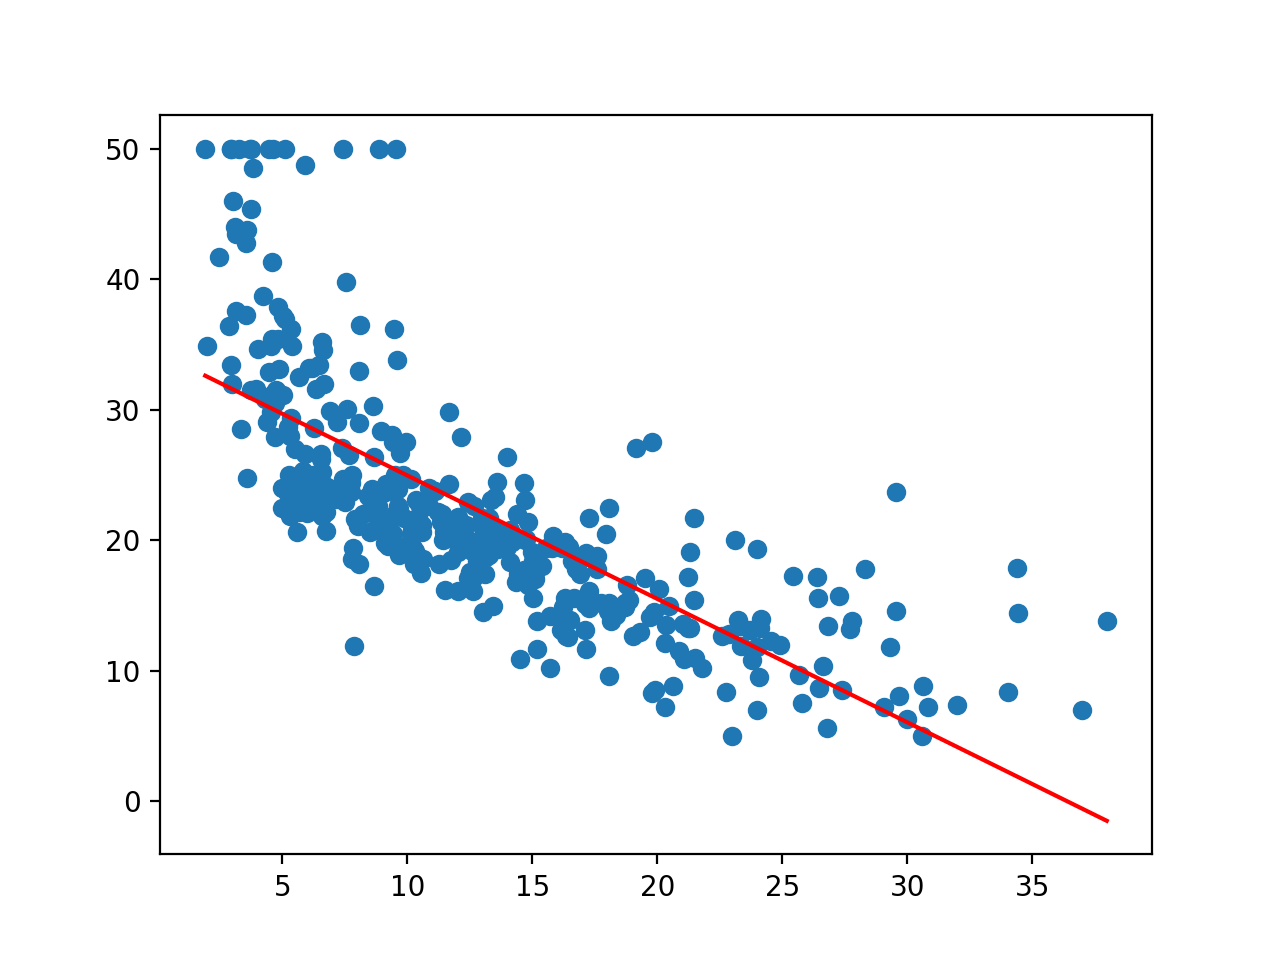

In [183]:
if X_train.shape[1]>1:
    print ('Select single feature to plot')
else:    
    plt.figure()
    plt.scatter(X_train, y_train)
    x_line= np.array([np.min(X_train), np.max(X_train)])
    z_line = lin_reg_mwd.predict(x_line.reshape(-1,1))
    plt.plot(x_line, z_line, '-', c='red')

<font color = green >

### Warning towards dimension

</font>

In [20]:
import numpy as np
np.random.seed(10)
a= np.random.randint(10, size= (4,1))

print ('a.shape= ', a.shape)
print (a) # 1 column 2d array 

b= np.random.randint (10, size= (4))
print ('\nb.shape= ', b.shape)
print (b) # 1d array 

c= a+b # brings matrix of shape (4,4)
print ('\nc.shape= ', c.shape)
print (c)

a= a.reshape (1,4)
print ('\nNow a.shape= ', a.shape)
print (a)
print ('b.shape= ', b.shape)
print (b) # 1d array 

c=a+b # Now it returns array of shape (1,4)
print ('\nc.shape= ', c.shape)
print (c)


a.shape=  (4, 1)
[[9]
 [4]
 [0]
 [1]]

b.shape=  (4,)
[9 0 1 8]

c.shape=  (4, 4)
[[18  9 10 17]
 [13  4  5 12]
 [ 9  0  1  8]
 [10  1  2  9]]

Now a.shape=  (1, 4)
[[9 4 0 1]]
b.shape=  (4,)
[9 0 1 8]

c.shape=  (1, 4)
[[18  4  1  9]]


In [63]:
a= np.arange(5)
print ('a.shape={}'.format(a.shape))
print (a)

print (np.sum(a**2)) # target operation
print (a @ a.T) # works for 1d vectors 
print (a @ a) # works for 1d vectors regardless of dimensions 

a = a.reshape (1,-1) # works for 2d row matrix (but returns array)
print ('a.shape={}'.format(a.shape))
print (a @ a.T)

a = a.reshape (-1,1) # brings completelly wrong result 
print ('a.shape={}'.format(a.shape))
print (a @ a.T)


a.shape=(5,)
[0 1 2 3 4]
30
30
30
a.shape=(1, 5)
[[30]]
a.shape=(5, 1)
[[ 0  0  0  0  0]
 [ 0  1  2  3  4]
 [ 0  2  4  6  8]
 [ 0  3  6  9 12]
 [ 0  4  8 12 16]]


In [5]:
# temp
import numpy as np
a= np.array([1,5,2,4,10,3])
np.argsort(a)[::-1]

array([4, 1, 3, 5, 2, 0])